# Kaggle House Price Challenge 

In [46]:
# Import the required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
%matplotlib inline

In [3]:
# Read in the training and test datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Numerical and Graphical EDA

In [5]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [16]:
# Get list of all numerical columns
numeric_feats = train.dtypes[train.dtypes != "object"].index
numeric_feats = numeric_feats.drop('Id', 'SalePrice')
numeric_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


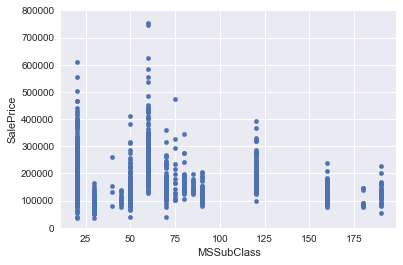

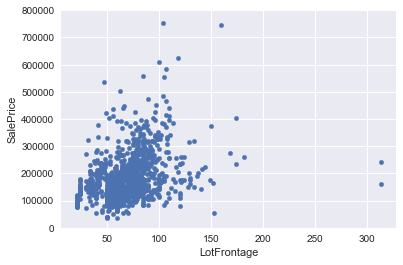

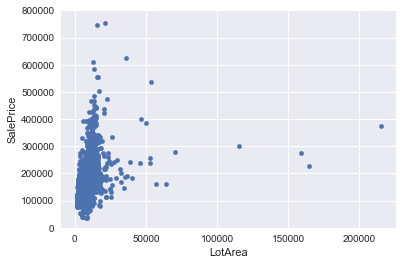

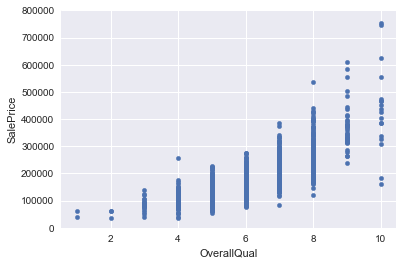

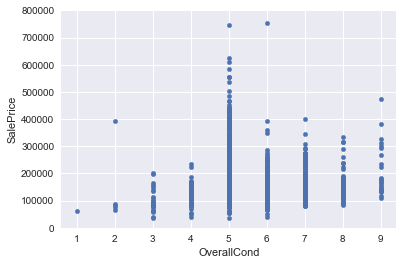

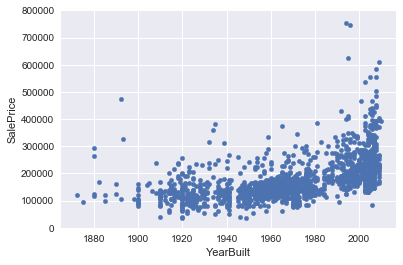

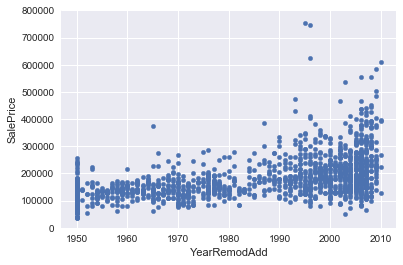

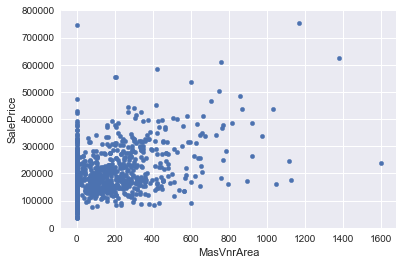

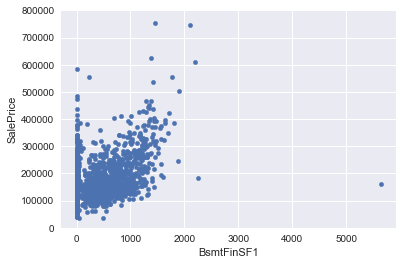

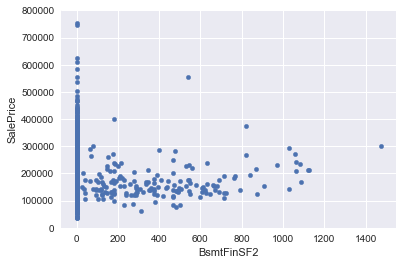

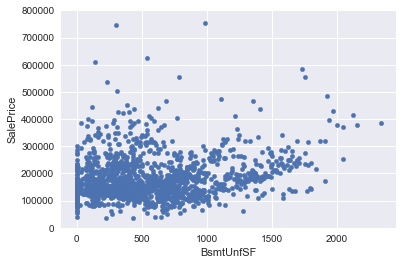

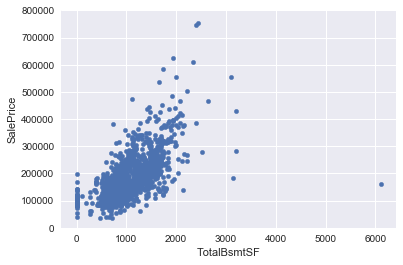

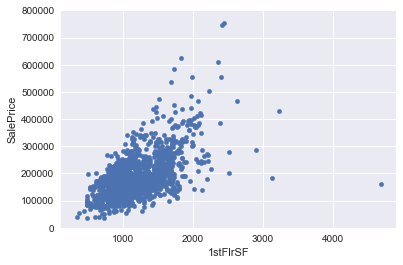

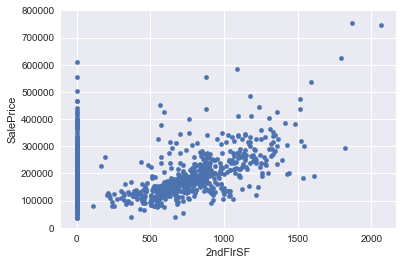

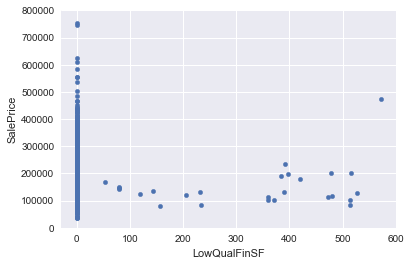

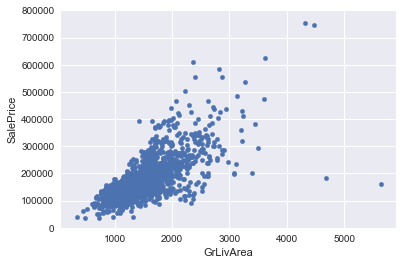

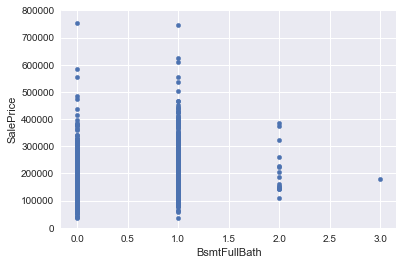

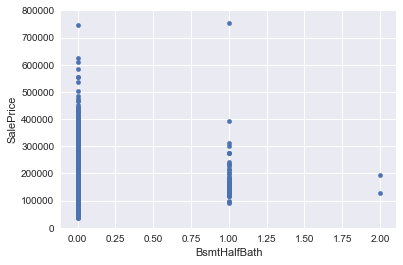

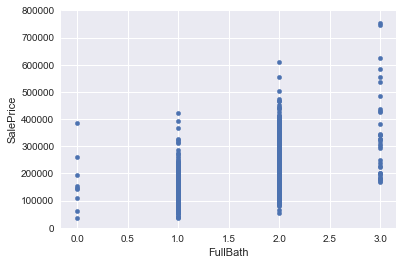

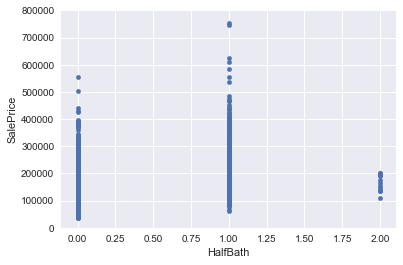

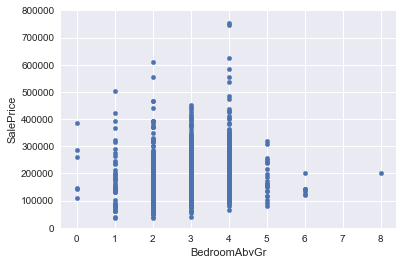

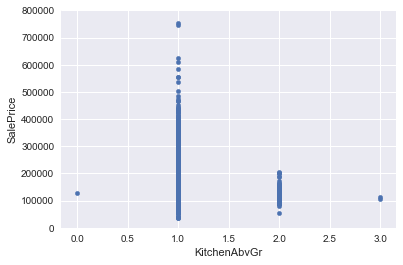

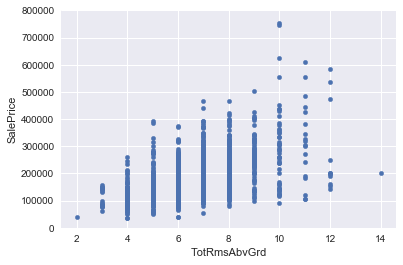

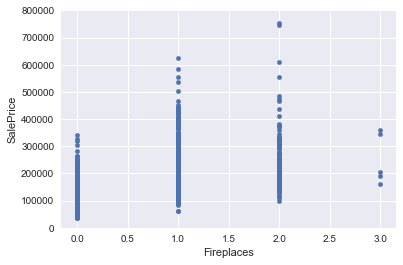

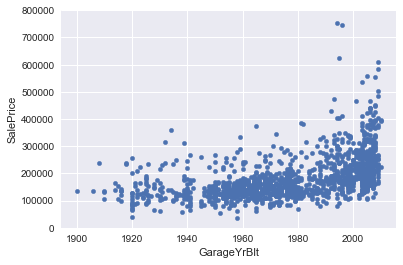

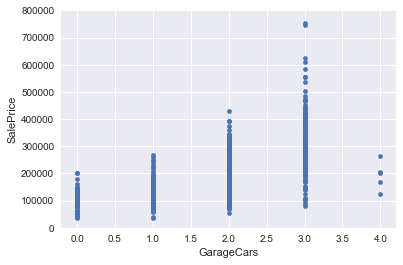

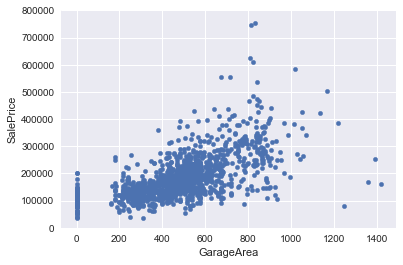

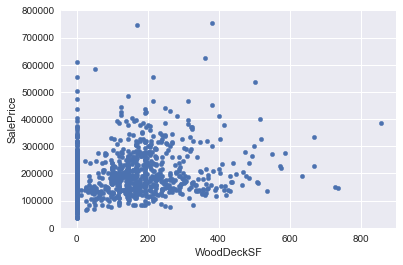

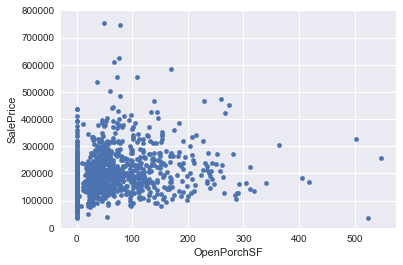

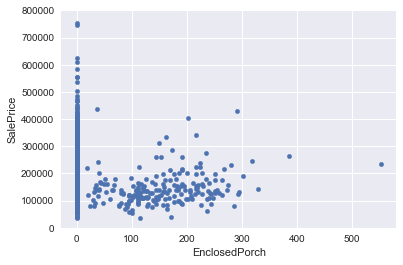

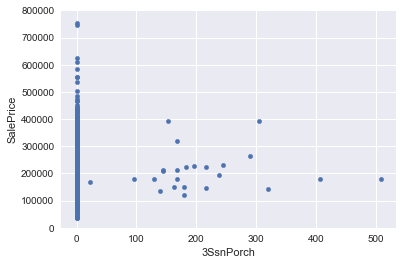

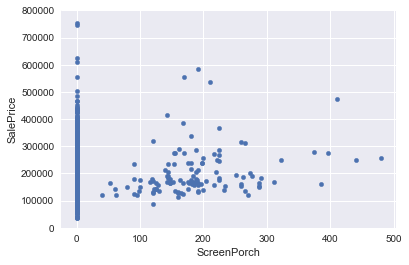

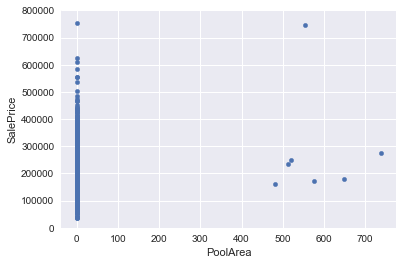

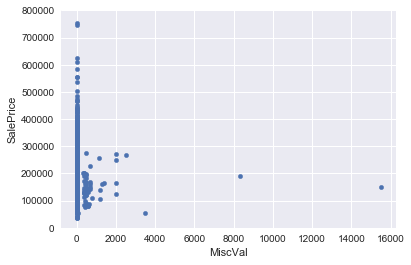

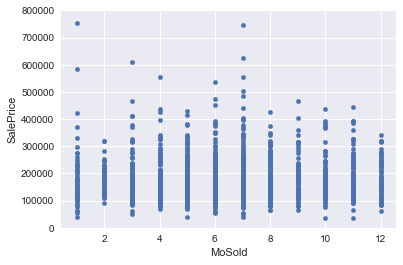

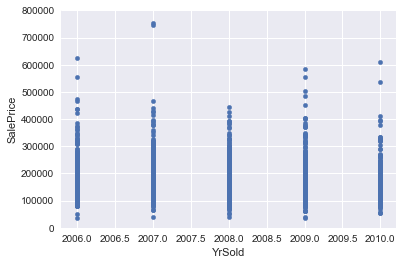

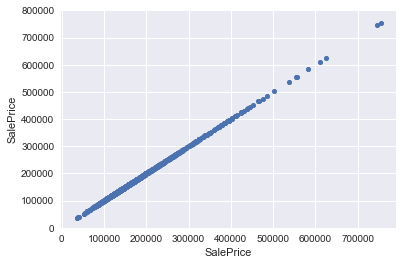

In [19]:
# scatter plot of numerical variables against the saleprice
var = list(numeric_feats)
try:
    for v in var:
        data = pd.concat([train['SalePrice'], train[v]], axis=1)
        data.plot.scatter(x=v, y='SalePrice', ylim=(0,800000));
except Exception as e:
    print(e)

In [30]:
shortlisted_vars = ["MSZoning","Neighborhood","HouseStyle","OverallQual","YearBuilt","ExterQual","Foundation","BsmtQual",
                    "GrLivArea","FullBath","TotRmsAbvGrd","GarageFinish","GarageCars","GarageArea","PavedDrive","SaleType",
                    "SaleCondition"]

In [31]:
shortlisted_vars01 = train[shortlisted_vars]

In [38]:
#shortlisted_vars01 = shortlisted_vars01.drop('Id', axis=1)
shortlisted_vars01.head()

,MSZoning,Neighborhood,HouseStyle,OverallQual,YearBuilt,ExterQual,Foundation,BsmtQual,GrLivArea,FullBath,TotRmsAbvGrd,GarageFinish,GarageCars,GarageArea,PavedDrive,SaleType,SaleCondition
0,RL,CollgCr,2Story,7,2003,Gd,PConc,Gd,1710,2,8,RFn,2,548,Y,WD,Normal
1,RL,Veenker,1Story,6,1976,TA,CBlock,Gd,1262,2,6,RFn,2,460,Y,WD,Normal
2,RL,CollgCr,2Story,7,2001,Gd,PConc,Gd,1786,2,6,RFn,2,608,Y,WD,Normal
3,RL,Crawfor,2Story,7,1915,TA,BrkTil,TA,1717,1,7,Unf,3,642,Y,WD,Abnorml
4,RL,NoRidge,2Story,8,2000,Gd,PConc,Gd,2198,2,9,RFn,3,836,Y,WD,Normal


In [34]:
pearson_corr = shortlisted_vars01.corr(method='pearson')
pearson_corr.head()

,OverallQual,YearBuilt,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
OverallQual,1.000000,0.572323,0.593007,0.550600,0.427452,0.600671,0.562022
YearBuilt,0.572323,1.000000,0.199010,0.468271,0.095589,0.537850,0.478954
GrLivArea,0.593007,0.199010,1.000000,0.630012,0.825489,0.467247,0.468997
FullBath,0.550600,0.468271,0.630012,1.000000,0.554784,0.469672,0.405656
TotRmsAbvGrd,0.427452,0.095589,0.825489,0.554784,1.000000,0.362289,0.337822


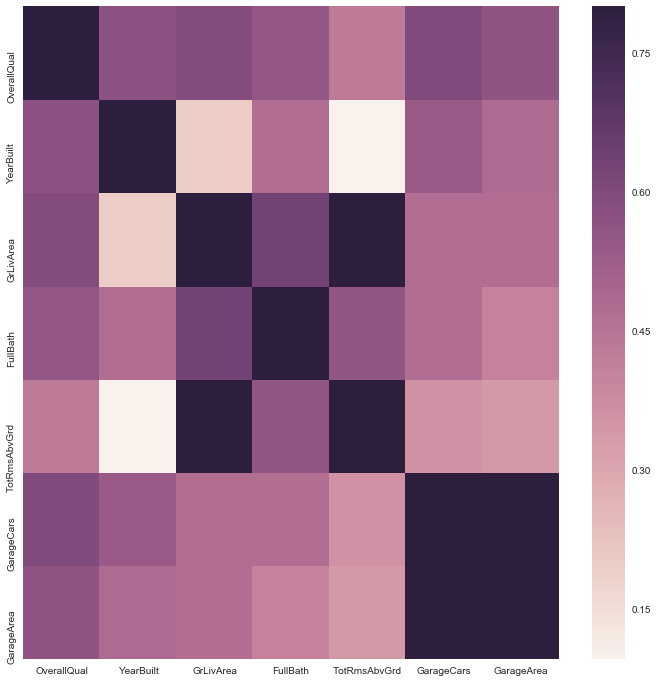

In [42]:
plt.subplots(figsize=(12, 12))
sns.heatmap(pearson_corr, vmax=.8, square=False);

# Transformations and imputations on the combined datasets

In [43]:
# Combine the test and the train datasets minus the saleprice column before imputing missing values.
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [44]:
all_data.shape

(2919, 79)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009BB014D5C0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000009BB0182278>]], dtype=object)

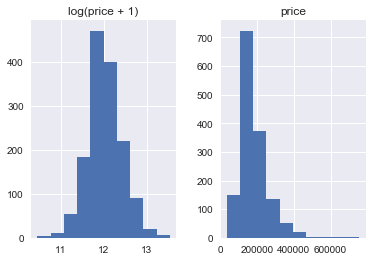

In [47]:
# The histogram of the salesprice shows that is skewed. It can be unskewed with a log transformation
# since it is skewed to the right
saleprice = pd.DataFrame({'log(price + 1)':np.log1p(train['SalePrice']), 'price':train['SalePrice'],})
saleprice.hist()


In [49]:
# Unskew the saleprice with a log transformatio:
train["SalePrice"] = np.log1p(train["SalePrice"])

In [50]:
# The section below unskews all the numeric variabes with a skewness greater than 0.75.

In [51]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

In [52]:
numeric_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [53]:
# Get the skewness values for all numeric columns.
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness

In [54]:
len(skewed_feats)

36

In [55]:
skewed_feats.sort_values(ascending=False)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.666326
OpenPorchSF       2.361912
LotFrontage       2.160866
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
GarageYrBlt      -0.648708
dtype: float64

In [56]:
# Retain only colums with a skewness greater than 0.75 for processing
skewed_feats = skewed_feats[skewed_feats > 0.75]

In [57]:
skewed_feats.sort_values(ascending=False)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.666326
OpenPorchSF       2.361912
LotFrontage       2.160866
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
dtype: float64

In [58]:
skewed_feats = skewed_feats.index

In [59]:
# Log tranform the skewed numeric variables
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [60]:
# Dummify the categorical variables with the get_dummies function in pandas
all_data = pd.get_dummies(all_data)

In [61]:
#filling NA's with the mean of the column: Another run will be made with the medians later on
all_data = all_data.fillna(all_data.mean())

In [62]:
# Separate the data back into the train and test sets:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [64]:
# Write copies of the transformed dataset back to csv files to  be used by other modules.
X_train.to_csv('X_train_cleaned.csv', index=True)
X_test.to_csv('X_test_cleaned.csv')
y.to_csv('y_SalePrice_cleaned.csv', index=True)

In [67]:
# Import modules for outlier calculation
import statsmodels.api as sm
import statsmodels.api as smapi
from statsmodels.formula.api import ols
import statsmodels.graphics as smgraphics

In [92]:
model = sm.OLS(yb,xb)
results = model.fit()
bonf_test = results.outlier_test()['bonf(p)']
bonf_outlier = list(bonf_test[bonf_test<1e-3].index) 
print(bonf_test[bonf_test<1e-3])

In [ ]:
Id
463     2.075106e-05
524     5.179492e-23
633     3.295357e-09
863     0.000000e+00
1171    5.771052e-07
1235    0.000000e+00
1249    0.000000e+00
1299    4.940763e-07
1325    2.118431e-04
1371    0.000000e+00
1424    6.249792e-06

In [120]:
# Import the Lasso modules
from sklearn.linear_model import LassoCV, LassoLarsCV

In [121]:
from sklearn.metrics import r2_score

In [66]:
# Create and train a Lasso Model with various lambdas
lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005])

y_pred_lasso = lasso.fit(X_train, y)
y_pred_lasso


LassoCV(alphas=[1, 0.1, 0.001, 0.0005], copy_X=True, cv=None, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [67]:
train_lasso = y_pred_lasso.predict(X_train)
train_lasso

array([ 12.24488065,  12.16093153,  12.29468479, ...,  12.4185593 ,
        11.82817286,  11.85732441])

In [70]:
r2_score_lasso = r2_score(y, train_lasso)
print("r^2 on train data : %f" % r2_score_lasso)

r^2 on train data : 0.930822


In [65]:
# Predict on the test data set
y_pred_lasso2 = y_pred_lasso.predict(X_test)

y_pred_lasso2

array([ 11.69490559,  11.92823243,  12.10183291, ...,  12.03779924,
        11.68640318,  12.33887195])

In [62]:
# Get most important coefficients of the variablesused in the Lasso model
coef = pd.Series(lasso.coef_, index = X_train.columns)
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
imp_coef

RoofMatl_ClyTile        -0.704161
MSZoning_C (all)        -0.292023
Condition2_PosN         -0.190552
Neighborhood_Edwards    -0.052560
SaleCondition_Abnorml   -0.047116
MSZoning_RM             -0.037698
CentralAir_N            -0.035440
GarageCond_Fa           -0.031688
LandContour_Bnk         -0.030934
SaleType_WD             -0.030656
OverallQual              0.053160
KitchenQual_Ex           0.063709
Exterior1st_BrkFace      0.070464
Neighborhood_NridgHt     0.071620
LotArea                  0.071826
Functional_Typ           0.072597
Neighborhood_NoRidge     0.085717
Neighborhood_Crawfor     0.105138
Neighborhood_StoneBr     0.112493
GrLivArea                0.400009
dtype: float64

In [91]:
lasso_pred = np.expm1(y_pred_lasso2)
lasso_pred

array([ 119958.03568086,  151482.56732178,  180200.85364774, ...,
        169023.5480817 ,  118942.41768702,  228403.15457007])

In [92]:
np.savetxt('lasso_pred.csv', lasso_pred, delimiter=',')

Text(0.5,1,'Lasso R^2: 0.930822')

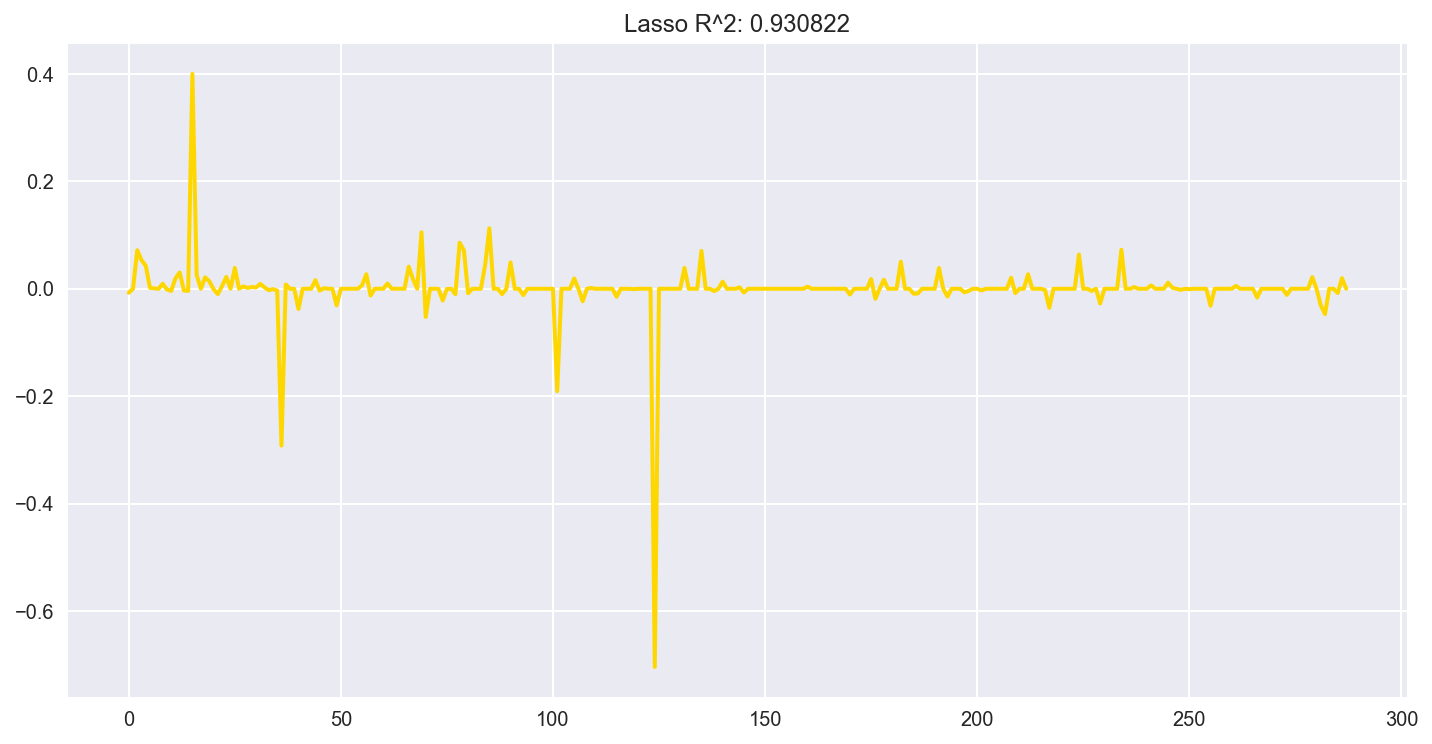

In [78]:
plt.plot(lasso.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
#plt.title("Lasso R^2: %f"
#          % (r2_score_lasso))

In [ ]:
plt.plot(coef, color='navy', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f"
          % (r2_score_lasso))
plt.show()

In [ ]:
Kaggle submission scored 0.12092

In [81]:
# Ridge Model

In [80]:
# define a function that returns the cross-validation rmse error so we can evaluate 
# the models and pick the best tuning parameters
from sklearn.linear_model import Ridge, 
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5)) 
    return(rmse)

In [82]:
model_ridge = Ridge()
model_ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [83]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

In [84]:
cv_ridge = pd.Series(cv_ridge, index = alphas)

Text(0,0.5,'rmse')

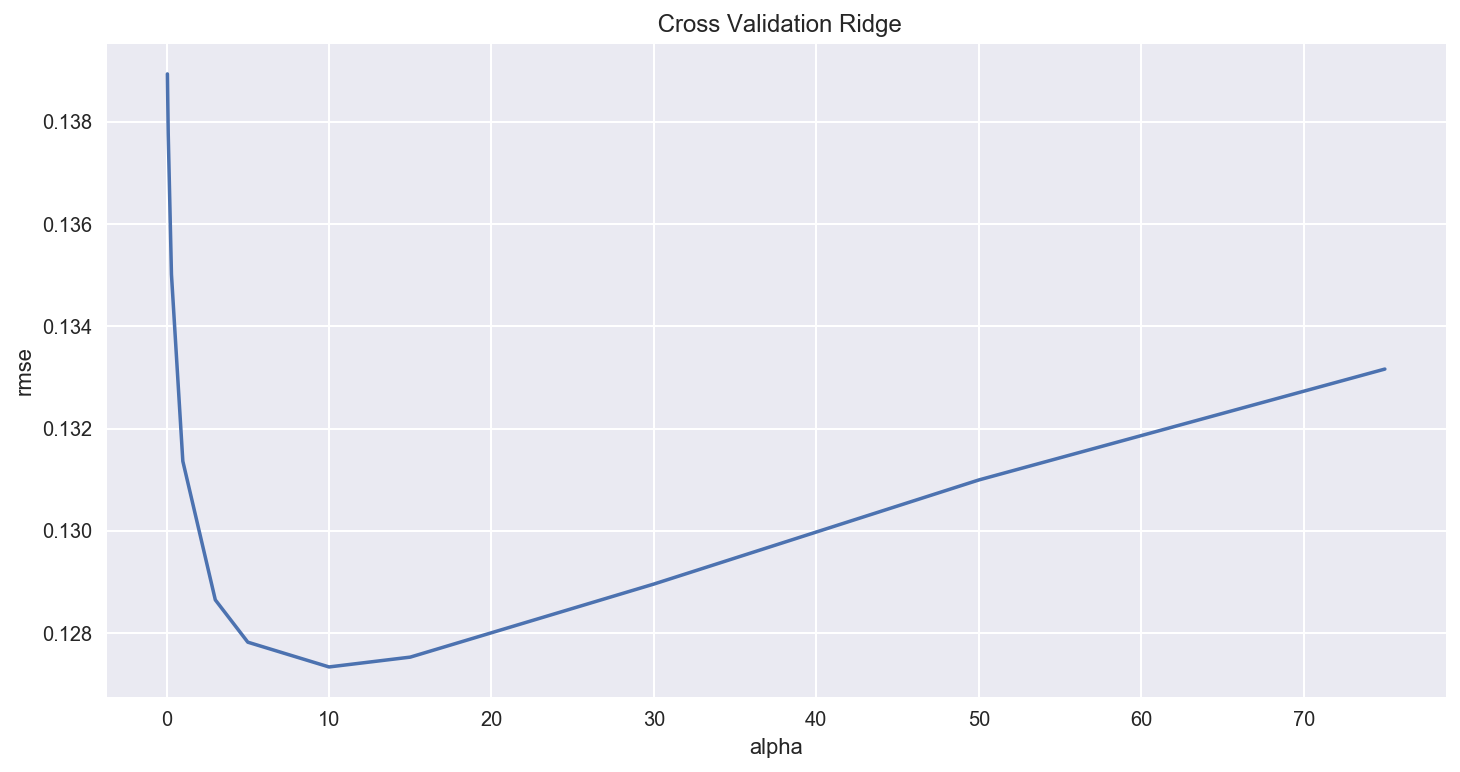

In [85]:
cv_ridge.plot(title = " Cross Validation Ridge")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [86]:
cv_ridge.min()

0.12733734668670763

In [87]:
cv_ridge.mean()

0.13159475841045787

In [89]:
model_ridge.fit(X_train, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [93]:
ridge_pred_train = model_ridge.predict(X_train)
ridge_pred_train

array([ 12.23806878,  12.17777975,  12.28561464, ...,  12.51209998,
        11.8624485 ,  11.85171462])

In [97]:
ridge_pred_test = model_ridge.predict(X_test)
ridge_pred_test

array([ 11.69875466,  11.94385404,  12.13089642, ...,  12.06967712,
        11.68995658,  12.29814566])

In [98]:
ridge_pred_test = np.expm1(ridge_pred_test)
ridge_pred_test

array([ 120420.65548861,  153867.56429787,  185515.00178513, ...,
        174498.49420751,  119365.82322068,  219287.97491859])

In [99]:
np.savetxt('ridge_pred.csv', ridge_pred_test, delimiter=',')

In [100]:
# Kaggle submission scored 0.12662

In [101]:
# Random forest model

In [145]:
# Import splitting module and modules needed for Random forest regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [301]:
## Load transformed dataset
#train_T = pd.read_csv('X_train_cleaned.csv')
#test_T = pd.read_csv('X_test_cleaned.csv')
y_T = pd.read_csv('y_SalePrice_cleaned.csv')

In [303]:
#y_T1 = y_T.values
y_T1

array([[ 12.24769912],
       [ 12.10901644],
       [ 12.31717117],
       ..., 
       [ 12.49313327],
       [ 11.86446927],
       [ 11.90159023]])

In [199]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(train_T, y_T, 
                                                    test_size=0.2, 
                                                    random_state=1234) 

In [200]:
# Set regressor function
train_rf = RandomForestRegressor() 

In [201]:
# Set parameters to perform a GridSearch over the hyperparameter space.
hyper_params = {'max_depth': [20,30,40,50], 'n_estimators': [500],'max_features': [100,120,140,160]} 

In [202]:
grid_CV = GridSearchCV(estimator = train_rf, param_grid = hyper_params, cv = 5, n_jobs = -1, verbose = 3) 

In [203]:
# fit, train features and target, this takes around minutes on the train dataset
grid_CV.fit(train_T, y_T)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  6.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [20, 30, 40, 50], 'n_estimators': [500], 'max_features': [100, 120, 140, 160]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [204]:
best_rf = grid_CV.best_estimator_
best_rf 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
           max_features=100, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [205]:
# Predict on train dataset and cross validate with labels
cv_rf = cross_val_score(best_rf, train_T, y_T, cv = 5, n_jobs = -1)

In [206]:
print('CV Score is: '+ str(np.mean(cv_rf)))

CV Score is: 0.880967413645


In [207]:
rf_train_pred = grid_CV.predict(train_T)

In [209]:
rf_train_pred

array([ 12.24850749,  12.08366555,  12.30368761, ...,  12.44557361,
        11.85154246,  11.9101058 ])

In [208]:
print(r2_score(y_T, rf_train_pred))

0.98403300416


In [210]:
print(mean_squared_error(y_T, rf_train_pred))

0.00254594442433


In [211]:
rf_pred = grid_CV.predict(test_T)

In [212]:
rf_pred

array([ 11.74017715,  11.94087491,  12.0930399 , ...,  11.91338237,
        11.61696686,  12.34538932])

In [215]:
rf_pred1 = np.expm1(rf_pred)

In [217]:
np.savetxt('random_forest_pred1.csv', rf_pred1, delimiter=',')

In [219]:
#Kaggle submission scored 0.14149, animprovement from the first submission score - 0,18.

In [220]:
# Another trial after reucing max_depth from 40 to 10 and max_features from 100 to 30 since the model overfitted above.

In [235]:
modified_rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=30, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [237]:
# Predict on train dataset and cross validate with labels
cv_rf = cross_val_score(modified_rf, train_T, y_T, cv = 5, n_jobs = -1)

In [238]:
print('CV Score is: '+ str(np.mean(cv_rf)))

CV Score is: 0.870388310184


In [225]:
best_rf.fit(train_T, y_T)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
           max_features=100, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [226]:
train_pred_rf = best_rf.predict(train_T)

In [227]:
train_pred_rf 

array([ 12.23999627,  12.08135464,  12.30194626, ...,  12.43077833,
        11.83433872,  11.90475024])

In [229]:
print(r2_score(y_T, train_pred_rf))

0.983816336217


In [240]:
modified_rf.fit(train_T, y_T)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=30, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [241]:
train_pred_rf2 = modified_rf.predict(train_T)

In [242]:
print(r2_score(y_T, train_pred_rf2))

0.966102130292


In [ ]:
modified_rf.predict(test_T)

In [243]:
#import math
np.expm1(rf_pred)

array([ 125513.57285126,  153409.85233506,  178623.28286395, ...,
        149249.64738767,  110963.63831163,  229896.61071851])

In [247]:
# Model stacking

In [250]:
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression

In [260]:
#lr = LinearRegression()
lasso_01 = lasso # LassoCV(alphas = [1, 0.1, 0.001, 0.0005]) 
ridge_01 = model_ridge # Ridge() # alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]



stregr = StackingRegressor(regressors=[lr, lasso_01, ridge_01, rfr_01], 
                           meta_regressor=lasso_01)


In [261]:
# Training the stacking classifier
stregr.fit(train_T, y_T)

StackingRegressor(meta_regressor=LassoCV(alphas=[1, 0.1, 0.001, 0.0005], copy_X=True, cv=None, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False),
         regressors=[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), LassoCV(alphas=[1, 0.1, 0.001, 0.0005], copy_X=True, cv=None, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,...timators=500, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)],
         verbose=0)

In [262]:
train_stregr = stregr.predict(train_T)

In [263]:
print(r2_score(y_T, train_stregr))

0.973031102984


In [264]:
print(mean_squared_error(y_T, train_stregr))

0.00430020234709


In [266]:
test_stregr = stregr.predict(test_T)
test_stregr

array([ 11.71267235,  11.93303341,  12.10730016, ...,  11.95371086,
        11.62988289,  12.34644745])

In [268]:
test_stregr_pred = np.expm1(test_stregr)
test_stregr_pred

array([ 122108.36431906,  152211.58453782,  181188.76078643, ...,
        155391.71849601,  112406.15759871,  230140.00214009])

In [269]:
np.savetxt('ensemble_pred.csv', test_stregr_pred, delimiter=',')

In [ ]:
# Kaggle submission scored 0.14915

In [356]:
# Initializing models
from sklearn.svm import SVR
from sklearn import linear_model

lasso_01 = linear_model.Lasso(alpha=0.0001)
lasso_02 = linear_model.Lasso(alpha=0.001)
ridge_02 = Ridge(random_state=1234)

stregr = StackingRegressor(regressors=[lasso_01, ridge_02], 
                           meta_regressor=lasso_02)


In [357]:
# Training the stacking classifier
stregr.fit(train_T, y_0)
#y_T2 = y_T.astype(float)
#y_T2 = np.array(y_T)
#y_T2.tolist()
#y_T2
#y_0 =  [float(i) for i in y_T2]
#y_0 = np.array(y_0)
#y_0.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


StackingRegressor(meta_regressor=Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
         regressors=[Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False), Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1234, solver='auto', tol=0.001)],
         verbose=0)

In [358]:
train_stregr = stregr.predict(train_T)
train_stregr

array([ 12.24667308,  12.17807359,  12.29300448, ...,  12.50091049,
        11.85642175,  11.8484296 ])

In [336]:
len(y_0)

1460

In [359]:
# Evaluate and visualize the fit

print("Mean Squared Error: %.4f"
    % np.mean((train_stregr - y_0) ** 2))




Mean Squared Error: 0.0090


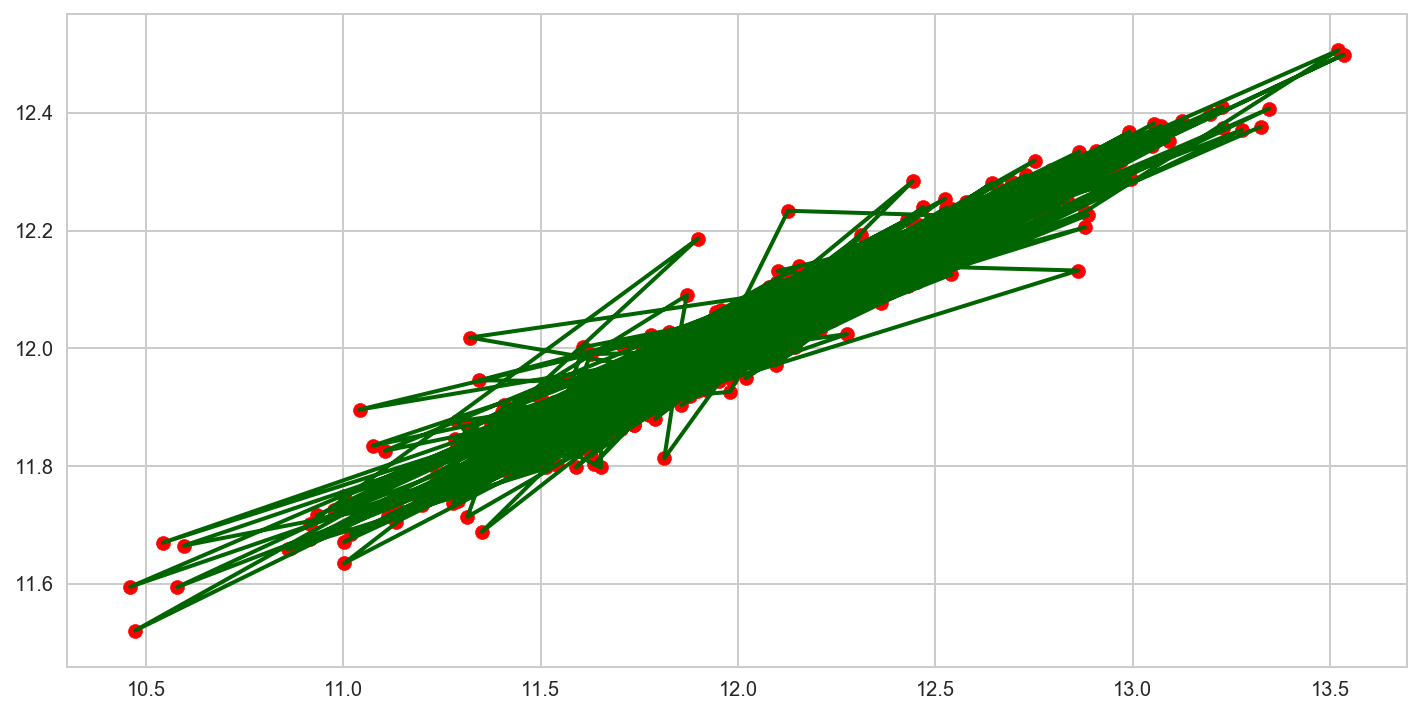

In [343]:
with plt.style.context(('seaborn-whitegrid')):
    plt.scatter(y_0, train_stregr, c='red')
    plt.plot(y_0, train_stregr, c='darkgreen') #, lw=2)

plt.show()

In [360]:
test_stregr = stregr.predict(test_T)
test_stregr

array([ 11.7131361 ,  11.92896417,  12.13018469, ...,  12.05621975,
        11.68788419,  12.29154429])

In [361]:
test_stregr_pred1 = np.expm1(test_stregr)
test_stregr_pred1

array([ 122165.00495953,  151593.45479583,  185383.01201034, ...,
        172165.9198378 ,  119118.70462836,  217845.13601432])

In [362]:
np.savetxt('ensemble_pred2.csv', test_stregr_pred1, delimiter=',')

In [ ]:
Kaggle submission scored 0.12513